# 資料預處理

In [91]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [92]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [93]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [94]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [95]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [96]:
from keras.models import Sequential
from keras.layers import Dense

In [97]:
model = Sequential()

In [98]:
model.add(Dense(units=5000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [99]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [100]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5000)              3925000   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                50010     
Total params: 3,975,010
Trainable params: 3,975,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [101]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [107]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=15, batch_size=200,verbose=2)

Epoch 1/15
240/240 - 129s - loss: 0.0093 - accuracy: 0.9970 - val_loss: 0.0925 - val_accuracy: 0.9784
Epoch 2/15
240/240 - 134s - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.1371 - val_accuracy: 0.9685
Epoch 3/15
240/240 - 122s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0978 - val_accuracy: 0.9758
Epoch 4/15
240/240 - 71s - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0799 - val_accuracy: 0.9822
Epoch 5/15
240/240 - 72s - loss: 0.0010 - accuracy: 0.9999 - val_loss: 0.0781 - val_accuracy: 0.9829
Epoch 6/15
240/240 - 73s - loss: 2.4784e-04 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9838
Epoch 7/15
240/240 - 72s - loss: 1.4193e-04 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9837
Epoch 8/15
240/240 - 72s - loss: 1.0827e-04 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9837
Epoch 9/15
240/240 - 73s - loss: 8.9511e-05 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9841
Epoch 10/15
240/240 - 72s - loss: 7.6501e-05 - accuracy: 1.0000 - val_lo

# 以圖形顯示訓練過程

In [108]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

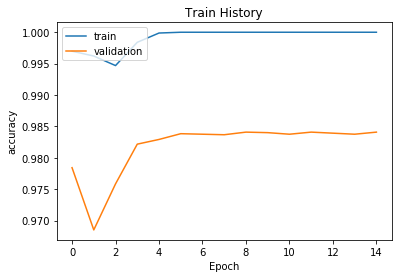

In [109]:
show_train_history(train_history,'accuracy','val_accuracy')

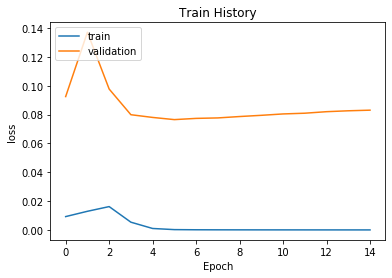

In [111]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [112]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 8s 26ms/step - loss: 0.0672 - accuracy: 0.9843

accuracy= 0.9843000173568726


In [ ]:
scores

# 進行預測

In [114]:
prediction=model.predict_classes(x_Test)

In [115]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [116]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

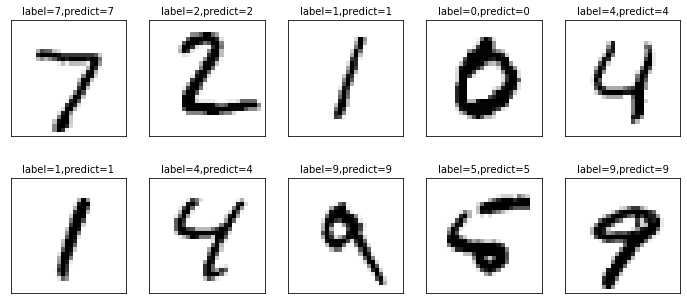

In [117]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [118]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,979,1,0,0,0,0,0,0,0,0
1,0,1134,0,0,0,0,0,0,1,0
2,1,0,1027,0,0,0,1,1,1,1
3,0,0,0,1007,0,0,0,1,2,0
4,1,0,0,0,980,0,0,1,0,0
5,1,0,0,0,0,888,3,0,0,0
6,1,1,0,0,2,0,954,0,0,0
7,0,0,4,0,0,0,0,1024,0,0
8,0,0,0,0,0,0,0,0,974,0


In [119]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [120]:
    k=df.label[i]
    j=df.predict[i]
    for i in range(10):
        if k==i and k!=j:
            print(df[(df.label==i)&(df.predict==j)])
    

In [121]:
len(df)

10000

In [122]:
df.label[0]

7

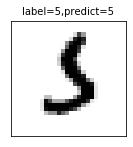

In [123]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

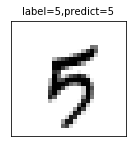

In [124]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)